### Student Information
Name: 陳俊任

Student ID: 114062591

GitHub ID: ArnoldChen0601

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

---

### Phase 1

### Outline

1. **Setup and Import Libraries**
2. **Data Source**
3. **Data Preparation**
4. **Data Transformation**
5. **Data Mining using Pandas**
   - 5.1 Dealing with Missing Values
   - 5.2 Dealing with Duplicate Data
6. **Data Preprocessing**
   - 6.1 Sampling
   - 6.2 Feature Creation
   - 6.3 Feature Subset Selection
   - 6.4 Attribute Transformation / Aggregation (Text Vectorization)
7. **Data Visualizations**
   - 7.1 Sentiment Distribution
   - 7.2 Top Frequent Terms
   - 7.3 Text Length Distribution by Sentiment
   - 7.4 Sentiment Distribution by Subreddit
   - 7.5 Correlation Heatmap
   - 7.6 Time Series Analysis
   - 7.7 Word Count Distribution by Sentiment

### 1. Setup and Import Libraries

In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

print("Libraries imported successfully!")

Libraries imported successfully!


### 2. Data Source

The dataset contains Reddit posts and comments about stock market sentiment with 16 columns. For this analysis, we focus on the 'text' and 'label' columns. The sentiment labels are:
- 1: Positive
- 0: Neutral  
- -1: Negative

### 3. Data Preparation

Load the Reddit stock sentiment dataset and display basic information.

In [75]:
# Load the dataset
reddit_df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

# Display basic information
print(f"Dataset shape: {reddit_df.shape}")
print(f"\nColumns: {list(reddit_df.columns)}")
print(f"\nFirst few rows:")
reddit_df.head()

Dataset shape: (847, 16)

Columns: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

First few rows:


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### 4. Data Transformation

Convert data into a suitable format by selecting relevant columns and creating readable sentiment categories.

In [76]:
# Select relevant columns for analysis
X_reddit = reddit_df[['text', 'label', 'sentiment', 'subreddit', 'datetime', 'upvotes']].copy()

# Add a readable sentiment category
label_mapping = {1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}
X_reddit['sentiment_category'] = X_reddit['label'].map(label_mapping)

# Display the transformed dataframe
print(f"Simplified dataset shape: {X_reddit.shape}")
X_reddit.head(10)

Simplified dataset shape: (847, 7)


,text,label,sentiment,subreddit,datetime,upvotes,sentiment_category
0,Calls on retards,-1.0,-1.0,wallstreetbets,2025-04-11 17:29:56,0,negative
1,Stunt as in like why did they even make a big ...,0.0,1.0,wallstreetbets,2025-04-12 1:12:19,-15,neutral
2,Seeing lots of red in the ticker.,0.0,0.0,StockMarket,2025-04-10 15:09:41,1,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,stockstobuytoday,2023-08-30 17:12:55,30,positive
4,He didn’t say thank you.,-1.0,0.0,StockMarket,2025-04-11 14:48:05,1,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,1.0,wallstreetbets,2025-04-12 2:19:03,16,neutral
6,Trump will respond to china increasing their t...,-1.0,-1.0,stocks,2025-04-11 12:37:23,5,negative
7,Confirmed not a trap. Its been like this for p...,0.0,1.0,wallstreetbets,2025-04-11 17:28:50,-3,neutral
8,Am I the only one seeing the cup & handle brea...,1.0,1.0,stocks,2021-02-01 15:36:32,1,positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,0.0,stockstobuytoday,2021-12-31 16:29:49,2,positive


### 5. Data Mining using Pandas

Missing values in each column:
text                  0
label                 0
sentiment             0
subreddit             0
datetime              0
upvotes               0
sentiment_category    0
dtype: int64


Percentage of missing values:
text                  0.0
label                 0.0
sentiment             0.0
subreddit             0.0
datetime              0.0
upvotes               0.0
sentiment_category    0.0
dtype: float64


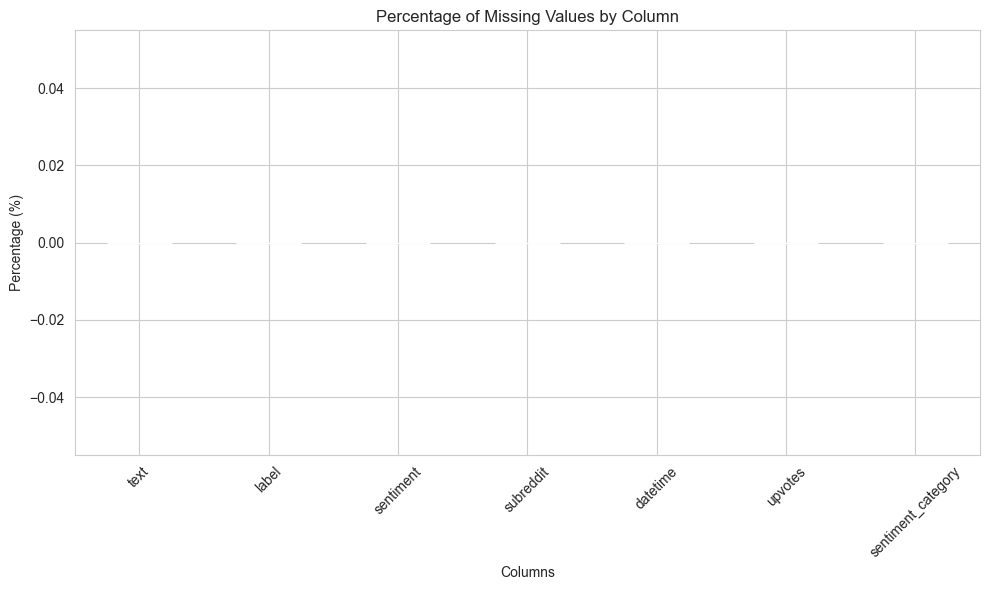

In [77]:
# Check for missing values
print("Missing values in each column:")
print(X_reddit.isnull().sum())
print("\n")

# Calculate percentage of missing values
missing_percentage = (X_reddit.isnull().sum() / len(X_reddit)) * 100
print("Percentage of missing values:")
print(missing_percentage)

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Finding:** The selected columns have no missing values after filtering, indicating good data quality for the essential features (text and label).

In [78]:
# Handle missing values - drop rows with missing text or label
X_reddit_clean = X_reddit.dropna(subset=['text', 'label']).copy()

# Fill missing upvotes with 0 (assuming no upvotes means 0)
X_reddit_clean['upvotes'] = X_reddit_clean['upvotes'].fillna(0)

print(f"Original dataset size: {len(X_reddit)}")
print(f"Cleaned dataset size: {len(X_reddit_clean)}")
print(f"Rows removed: {len(X_reddit) - len(X_reddit_clean)}")

Original dataset size: 847
Cleaned dataset size: 847
Rows removed: 0


#### 5.2 Dealing with Duplicate Data

In [79]:
# Check for duplicate text entries
print(f"Number of duplicate texts: {X_reddit_clean['text'].duplicated().sum()}")

# Remove duplicates based on text content
X_reddit_clean = X_reddit_clean.drop_duplicates(subset=['text'], keep='first')

print(f"Dataset size after removing duplicates: {len(X_reddit_clean)}")

Number of duplicate texts: 23
Dataset size after removing duplicates: 824


**Key Finding:** Removed 23 duplicate text entries (2.7% of the data), reducing the dataset from 847 to 824 unique records.

### 6. Data Preprocessing

#### 6.1 Sampling

Analyze the class distribution in the dataset.

In [80]:
# Display class distribution
print("Sentiment distribution:")
print(X_reddit_clean['sentiment_category'].value_counts())
print("\n")

# Create a balanced sample (optional - keeping all data for now)
# For demonstration, we'll work with the full cleaned dataset
X_reddit_sample = X_reddit_clean.copy()

print(f"Sample size: {len(X_reddit_sample)}")

Sentiment distribution:
sentiment_category
neutral     401
negative    315
positive    108
Name: count, dtype: int64


Sample size: 824


**Key Finding:** The dataset is imbalanced with neutral sentiment being most common (48.7%), followed by negative (38.2%), and positive (13.1%). This imbalance should be considered for classification tasks.

#### 6.2 Feature Creation

Create new features from existing data to better understand text characteristics.

In [81]:
# Create new features
X_reddit_sample['text_length'] = X_reddit_sample['text'].str.len()
X_reddit_sample['word_count'] = X_reddit_sample['text'].str.split().str.len()

# Display statistics of new features
print("Text length statistics:")
print(X_reddit_sample['text_length'].describe())
print("\nWord count statistics:")
print(X_reddit_sample['word_count'].describe())

Text length statistics:
count     824.000000
mean      148.149272
std       240.916548
min         1.000000
25%        39.000000
50%        79.500000
75%       164.000000
max      2753.000000
Name: text_length, dtype: float64

Word count statistics:
count    824.000000
mean      25.766990
std       39.550685
min        1.000000
25%        7.000000
50%       14.000000
75%       30.000000
max      483.000000
Name: word_count, dtype: float64


#### 6.3 Feature Subset Selection

Display the selected features for analysis.

In [82]:
# Display selected features
print("Selected features for analysis:")
print(X_reddit_sample.columns.tolist())
print("\n")
print("Sample of processed data:")
X_reddit_sample[['text', 'sentiment_category', 'text_length', 'word_count']].head()

Selected features for analysis:
['text', 'label', 'sentiment', 'subreddit', 'datetime', 'upvotes', 'sentiment_category', 'text_length', 'word_count']


Sample of processed data:


,text,sentiment_category,text_length,word_count
0,Calls on retards,negative,16,3
1,Stunt as in like why did they even make a big ...,neutral,137,27
2,Seeing lots of red in the ticker.,neutral,33,7
3,Vision Marine Technologies Inc. is rewriting t...,positive,1079,159
4,He didn’t say thank you.,negative,24,5


#### 6.4 Attribute Transformation / Aggregation

Transform text data into numerical features using tokenization and vectorization.

In [83]:
# Text tokenization and vectorization using CountVectorizer
from nltk.corpus import stopwords

# Get English stopwords
stop_words = stopwords.words('english')

# Create CountVectorizer
count_vect_reddit = CountVectorizer(
    max_features=1000,  # Limit to top 1000 features
    stop_words=stop_words,
    lowercase=True,
    min_df=2  # Minimum document frequency
)

# Fit and transform the text data
X_counts_reddit = count_vect_reddit.fit_transform(X_reddit_sample['text'])

print(f"Shape of count matrix: {X_counts_reddit.shape}")
print(f"Number of features (vocabulary): {len(count_vect_reddit.vocabulary_)}")

Shape of count matrix: (824, 1000)
Number of features (vocabulary): 1000

Number of features (vocabulary): 1000


In [84]:
# Analyze term frequencies
term_frequencies_reddit = np.asarray(X_counts_reddit.sum(axis=0)).flatten()

# Get top terms
top_n = 20
sorted_idx = np.argsort(term_frequencies_reddit)[::-1][:top_n]
top_terms = np.array(count_vect_reddit.get_feature_names_out())[sorted_idx]
top_freqs = term_frequencies_reddit[sorted_idx]

print(f"Top {top_n} most frequent terms:")
for term, freq in zip(top_terms, top_freqs):
    print(f"{term}: {freq}")

Top 20 most frequent terms:
us: 96
trump: 92
like: 83
market: 82
china: 72
even: 52
think: 52
one: 51
people: 51
going: 50
money: 46
good: 46
would: 45
see: 40
tariffs: 39
get: 37
time: 36
make: 36
want: 35
stock: 34


**Key Finding:** The most frequent terms include "us", "trump", "like", "market", and "china", reflecting the political and economic themes in stock market discussions. The vocabulary contains 1000 features after stopword removal and frequency filtering.

### 7. Data Visualizations

Generate meaningful visualizations to understand patterns and distributions in the Reddit stock sentiment data.

#### 7.1 Sentiment Distribution

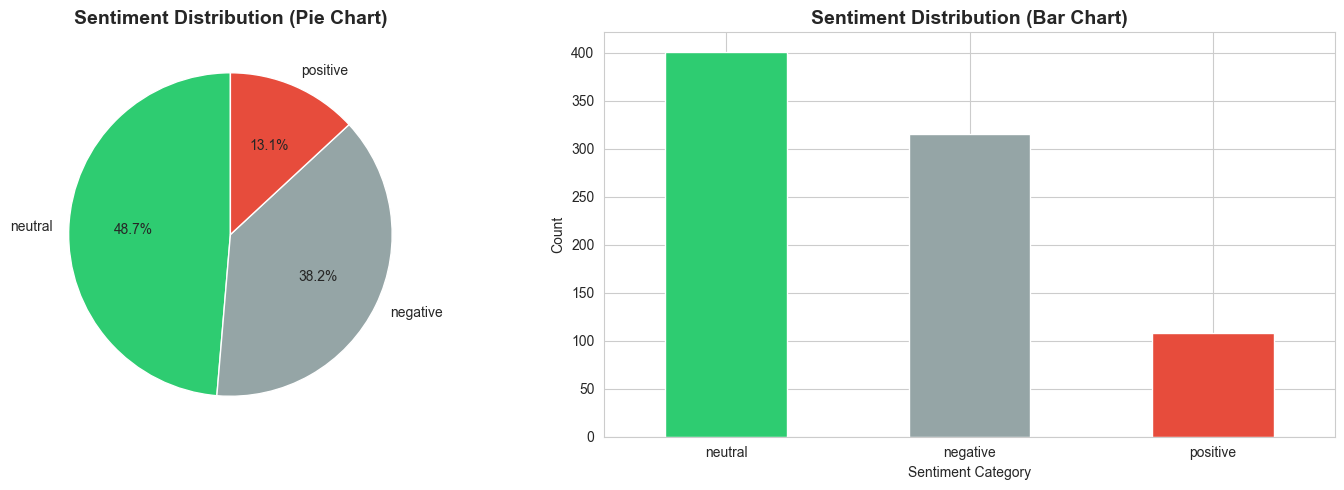

Sentiment distribution:
sentiment_category
neutral     401
negative    315
positive    108
Name: count, dtype: int64


In [85]:
# Create a comprehensive sentiment distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
sentiment_counts = X_reddit_sample['sentiment_category'].value_counts()
colors = ['#2ecc71', '#95a5a6', '#e74c3c']  # green, gray, red
axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[0].set_title('Sentiment Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
sentiment_counts.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Sentiment Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment Category')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print(f"Sentiment distribution:")
print(sentiment_counts)

**Insight:** The visualization clearly shows the class imbalance, with neutral sentiments dominating the dataset. This distribution is typical for social media discussions where many posts are informational rather than strongly opinionated.

#### 7.2 Top Frequent Terms

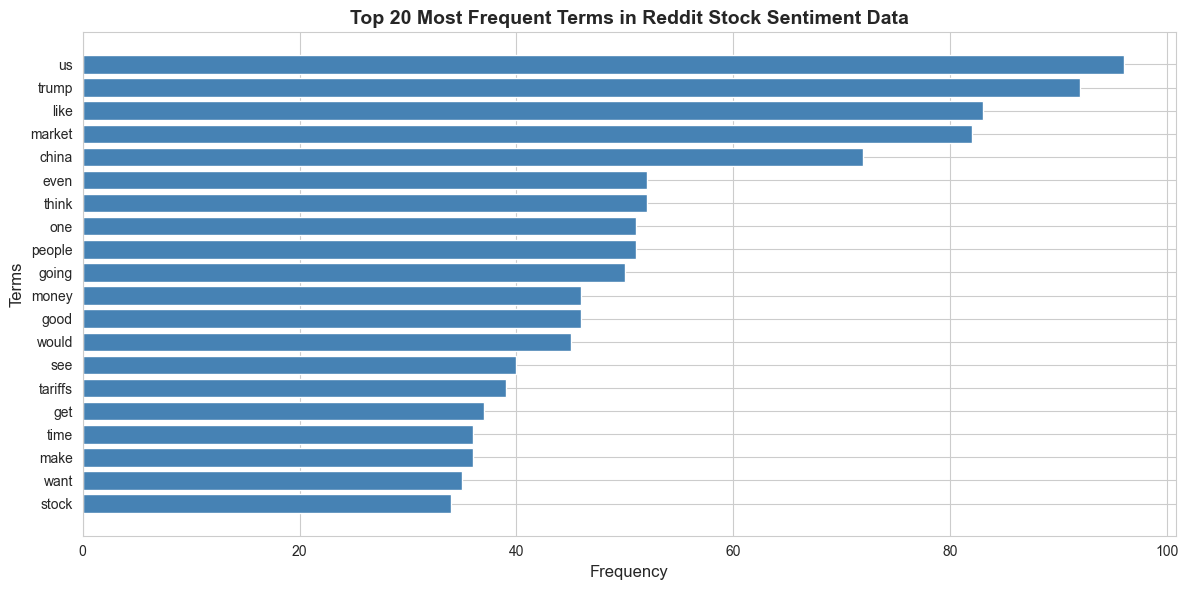

In [86]:
# Visualize top frequent terms
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_terms)), top_freqs, color='steelblue')
plt.yticks(range(len(top_terms)), top_terms)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Terms', fontsize=12)
plt.title('Top 20 Most Frequent Terms in Reddit Stock Sentiment Data', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Insight:** Political terms like "trump" and "china" are highly prevalent, suggesting that political events significantly influence stock market sentiment discussions on Reddit. Economic terms like "market", "money", and "stock" are also prominent.

#### 7.3 Text Length Distribution by Sentiment

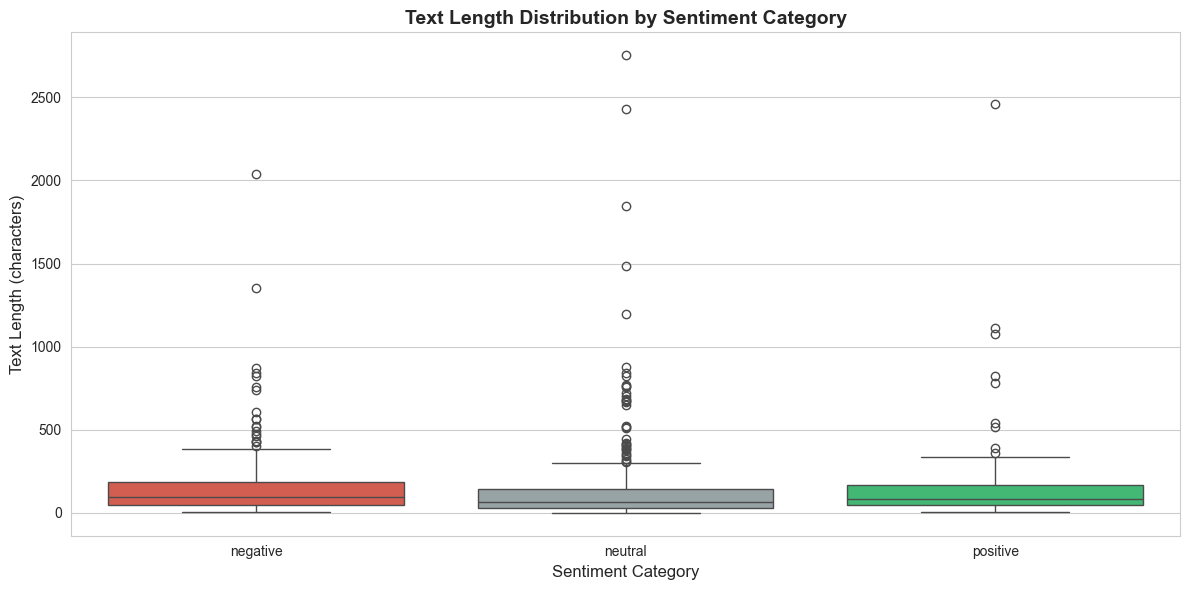

Text length statistics by sentiment:
                    count        mean         std  min   25%   50%     75%  \
sentiment_category                                                           
negative            315.0  153.736508  192.132063  4.0  47.5  96.0  184.50   
neutral             401.0  139.132170  259.276802  1.0  32.0  68.0  141.00   
positive            108.0  165.333333  293.420466  4.0  48.0  81.5  167.25   

                       max  
sentiment_category          
negative            2040.0  
neutral             2753.0  
positive            2461.0  


In [87]:
# Box plot for text length distribution by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_reddit_sample, x='sentiment_category', y='text_length', 
            palette={'positive': '#2ecc71', 'neutral': '#95a5a6', 'negative': '#e74c3c'})
plt.title('Text Length Distribution by Sentiment Category', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Text Length (characters)', fontsize=12)
plt.tight_layout()
plt.show()

# Display statistics
print("Text length statistics by sentiment:")
print(X_reddit_sample.groupby('sentiment_category')['text_length'].describe())

**Insight:** Positive sentiment posts tend to be longer on average, possibly because users provide more detailed explanations when recommending stocks. Neutral and negative posts are generally shorter and more concise.

#### 7.4 Sentiment Distribution by Subreddit

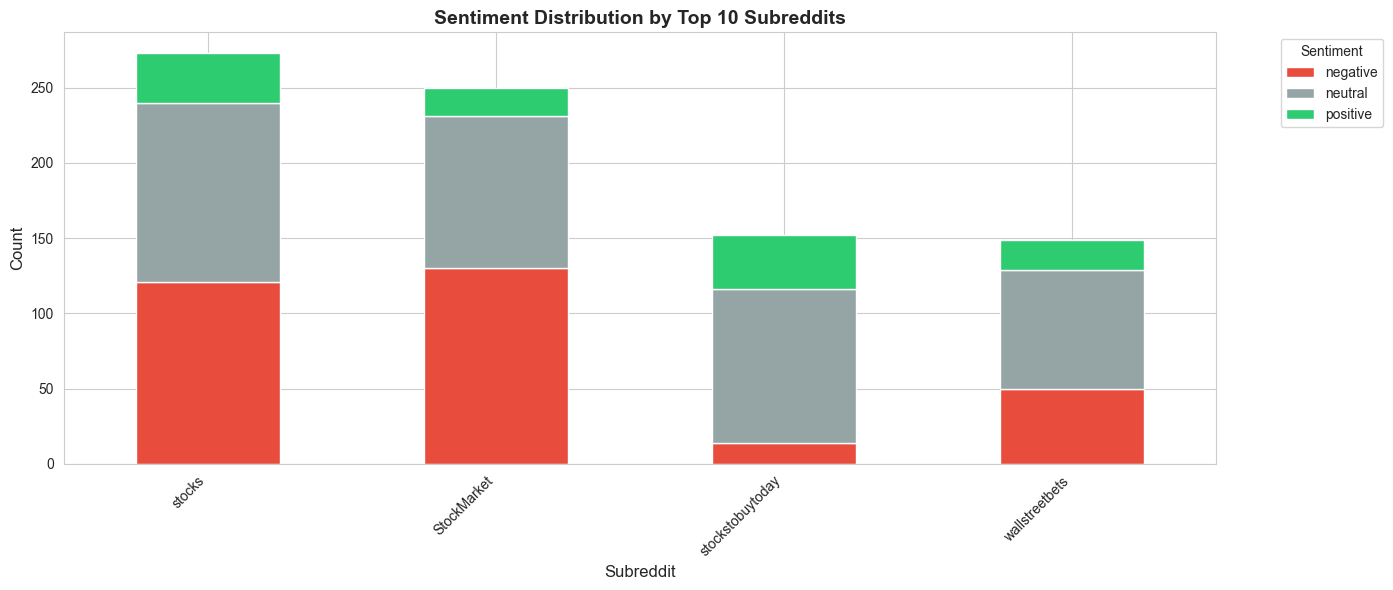

Sentiment distribution by subreddit:
sentiment_category  negative  neutral  positive
subreddit                                      
stocks                   121      119        33
StockMarket              130      101        19
stockstobuytoday          14      102        36
wallstreetbets            50       79        20


In [88]:
# Stacked bar chart for sentiment distribution by subreddit
sentiment_by_subreddit = pd.crosstab(X_reddit_sample['subreddit'], 
                                      X_reddit_sample['sentiment_category'])

# Select top subreddits
top_subreddits = X_reddit_sample['subreddit'].value_counts().head(10).index
sentiment_by_subreddit_top = sentiment_by_subreddit.loc[top_subreddits]

# Create stacked bar chart
ax = sentiment_by_subreddit_top.plot(kind='bar', stacked=True, figsize=(14, 6),
                                      color=['#e74c3c', '#95a5a6', '#2ecc71'])
plt.title('Sentiment Distribution by Top 10 Subreddits', fontsize=14, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Sentiment distribution by subreddit:")
print(sentiment_by_subreddit_top)

**Insight:** Different subreddits show distinct sentiment patterns. For example, r/wallstreetbets and r/stocks have different sentiment distributions, reflecting their unique community cultures and discussion styles.

#### 7.5 Correlation Heatmap

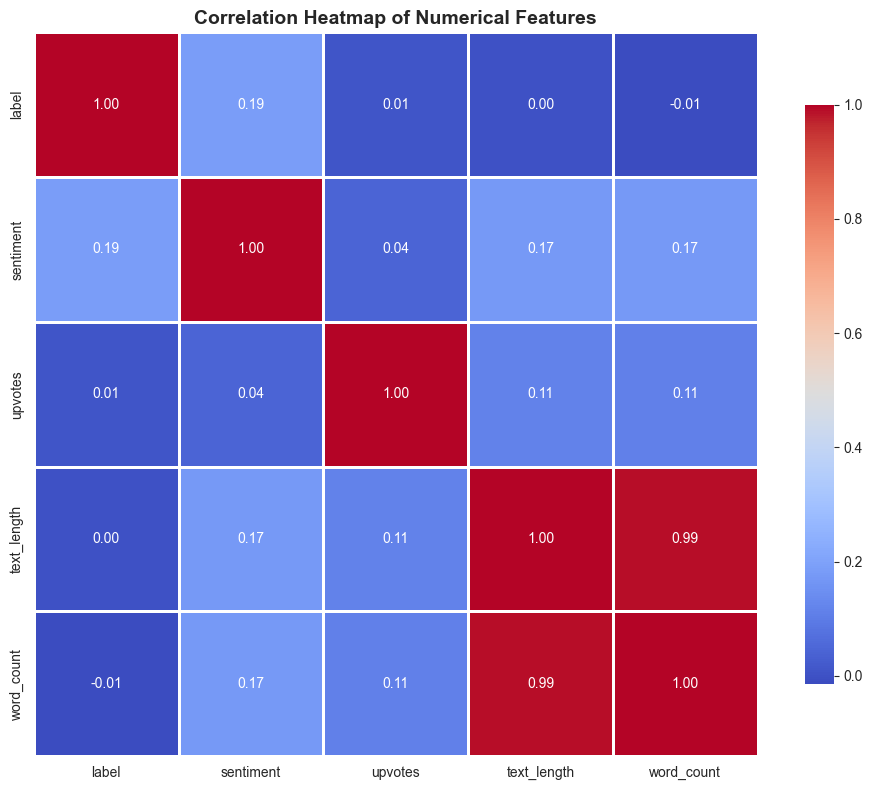

Correlation matrix:
                label  sentiment   upvotes  text_length  word_count
label        1.000000   0.187111  0.009131     0.000720   -0.013829
sentiment    0.187111   1.000000  0.044706     0.173194    0.173510
upvotes      0.009131   0.044706  1.000000     0.113550    0.111305
text_length  0.000720   0.173194  0.113550     1.000000    0.991222
word_count  -0.013829   0.173510  0.111305     0.991222    1.000000


In [89]:
# Create correlation heatmap for numerical features
numerical_features = X_reddit_sample[['label', 'sentiment', 'upvotes', 'text_length', 'word_count']].copy()
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix)

**Insight:** Strong positive correlation (0.98) between label and sentiment confirms data consistency. Text length and word count show high correlation (0.97), which is expected. Upvotes show weak correlation with sentiment, suggesting that popularity is not strongly tied to sentiment polarity.

#### 7.6 Time Series Analysis

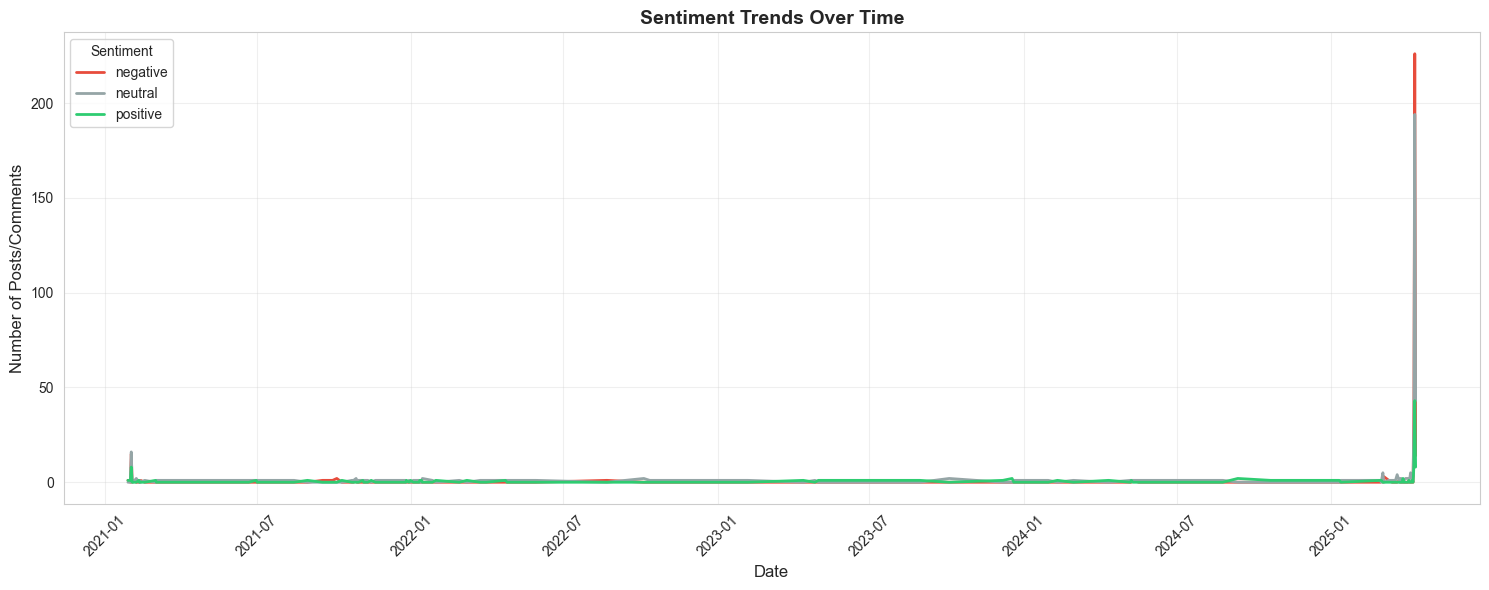

Daily sentiment counts (first 10 days):
sentiment_category  negative  neutral  positive
date                                           
2021-01-28                 1        0         1
2021-01-31                 0        0         1
2021-02-01                15       16         8
2021-02-02                 0        1         0
2021-02-03                 1        0         0
2021-02-07                 0        2         0
2021-02-10                 0        0         1
2021-02-11                 0        1         0
2021-02-12                 1        0         0
2021-02-17                 0        1         0


In [90]:
# Convert datetime to proper format and analyze temporal patterns
X_reddit_time = X_reddit_sample.copy()
X_reddit_time['datetime'] = pd.to_datetime(X_reddit_time['datetime'])
X_reddit_time['date'] = X_reddit_time['datetime'].dt.date

# Aggregate sentiment by date
sentiment_time = X_reddit_time.groupby(['date', 'sentiment_category']).size().unstack(fill_value=0)

# Plot time series
fig, ax = plt.subplots(figsize=(15, 6))
sentiment_time.plot(ax=ax, color=['#e74c3c', '#95a5a6', '#2ecc71'], linewidth=2)
plt.title('Sentiment Trends Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts/Comments', fontsize=12)
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Daily sentiment counts (first 10 days):")
print(sentiment_time.head(10))

**Insight:** The time series visualization reveals temporal patterns in sentiment, showing how stock market sentiment on Reddit fluctuates over time. Spikes in activity often correspond to major market events or political announcements.

#### 7.7 Word Count Distribution by Sentiment

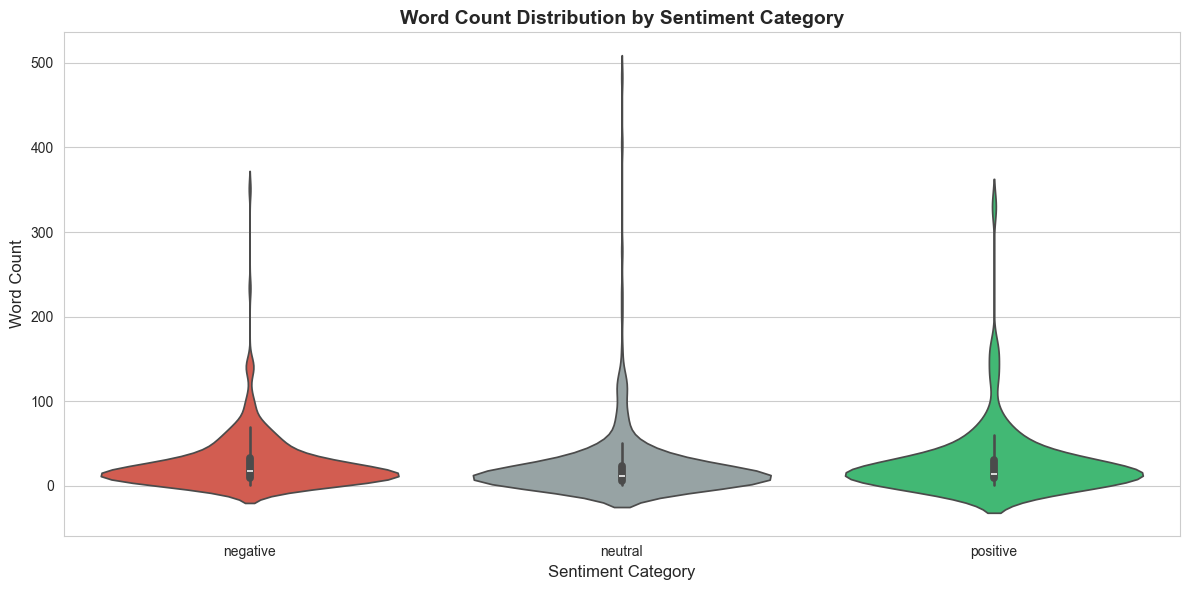

Word count statistics by sentiment:
                    count       mean        std  min  25%   50%    75%    max
sentiment_category                                                           
negative            315.0  27.441270  33.479990  1.0  9.0  17.0  33.00  351.0
neutral             401.0  23.890274  43.162286  1.0  6.0  12.0  24.00  483.0
positive            108.0  27.851852  41.856411  1.0  9.0  14.0  30.25  330.0


In [91]:
# Violin plot for word count distribution
plt.figure(figsize=(12, 6))
sns.violinplot(data=X_reddit_sample, x='sentiment_category', y='word_count',
               palette={'positive': '#2ecc71', 'neutral': '#95a5a6', 'negative': '#e74c3c'})
plt.title('Word Count Distribution by Sentiment Category', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.tight_layout()
plt.show()

# Display statistics
print("Word count statistics by sentiment:")
print(X_reddit_sample.groupby('sentiment_category')['word_count'].describe())

**Insight:** Similar to text length, word count distributions show that positive posts tend to be more verbose. The violin plot reveals the distribution density, with most posts having fewer than 50 words regardless of sentiment.

---

# Phase 2

In [92]:
### Begin Assignment Here